In [23]:
# Rename the files

import os

def rename(x):
    new = x.split('_')
    two = new[1].split('.txt')[0]
    return two + '_' + new[0] + '.txt'

directory = os.listdir("C:\\Users\\nathan.a.miller\\OneDrive - Accenture Federal Services\\USCIS\\Text\\Plagiarism Sample Text\\o+p")

for i in directory:
#     print(rename(i))
    os.rename("C:\\Users\\nathan.a.miller\\OneDrive - Accenture Federal Services\\USCIS\\Text\\Plagiarism Sample Text\\o+p\\" + i, "C:\\Users\\nathan.a.miller\\OneDrive - Accenture Federal Services\\USCIS\\Text\\Plagiarism Sample Text\\o+p\\" + rename(i))



In [5]:
# Pre-processing functions

import re
import string
import time

regex = re.compile('[%s]' % re.escape(string.punctuation))
# test = 'a bc defg hij k && lmno pqr stuv \t wxy z \n abcd nate is the  ;best  '  

def re_remove_punct(s):  # From Vinko's solution, with fix.
    return regex.sub('', s)

def remove_spaces(s, extra = False):
    s = s.lower()
    s = re_remove_punct(s)
    s = " ".join(s.split())
    if extra == True:
        s = s.replace(' ','')
    return s

def create_shingled_features(s, k, clean = False, remove_all_spaces= False, print_to_file = False, res = 'result ' + time.strftime("%Y%m%d-%H%M%S") + '.txt'):
    output = []
    if clean == True:
        s = remove_spaces(s, extra = remove_all_spaces)
    f = open(res, 'a')
    while True:
        result = (s[:k], s[1:])
        s = result[1]
        if result[0] == '':
            break
        if print_to_file == True:
            f.write(result[0] + '\n')
        else:
            output.append(result[0])
    f.close()
    if print_to_file == True:
        print("File printed to '" + res + "'")
    else:
        return output


In [24]:
# Pre-process and Simhash all the files, place into a dictionary called "all_simhasht"

from simhash import Simhash, SimhashIndex
from collections import OrderedDict
### Create hamming distance matrix

#### import Shari's plagiarized samples

import glob
path="C:\\Users\\nathan.a.miller\\OneDrive - Accenture Federal Services\\USCIS\\Text\\Plagiarism Sample Text\\o+p\\*.txt"
chop = "C:\\Users\\nathan.a.miller\\OneDrive - Accenture Federal Services\\USCIS\\Text\\Plagiarism Sample Text\\o+p\\"

all_dict = {} #store Shari's sample plagiarism files here

for filename in glob.iglob(path):
    chopt = filename.replace(chop,'')
    with open(filename, encoding="ISO-8859-1") as f:
        all_dict[chopt] = f.read()
    
# all_dict = OrderedDict(sorted(all_dict.items(), key=lambda t: t[0]))  # use this for creating the hamming distance matrix  

keys = list(all_dict.keys())

### Create the index of simhashed files

objs = [(str(k), Simhash(create_shingled_features(s, 3, clean=True))) for k, s in all_dict.items()]
index = SimhashIndex(objs, k=12)

all_simhasht = {}

for i in objs:
    all_simhasht[i[0]] = i[1]
    
# all_simhasht = OrderedDict(sorted(all_simhasht.items(), key=lambda t: t[0])) # use this for creating the hamming distance matrix     

In [7]:
# Calculate Hamming Distances for each simhash'd file and input into a matrix

import numpy as np
import pandas as pd

# np.set_printoptions(threshold=np.nan)
distances = np.empty(len(all_simhasht))

for i in all_simhasht:
    m = []
    for j in all_simhasht:
        m.append(all_simhasht[j].distance(all_simhasht[i]))
    distances = np.vstack([distances, m])
    
print(all_simhasht.keys())    
distances = np.delete(distances, (0), axis=0) # for some reason, the first row is all 0s

df = pd.DataFrame(distances)
df.astype(int)


dict_keys(['g0pA_taskc.txt', 'g2pB_taska.txt', 'g1pB_taskc.txt', 'g2pA_taskd.txt', 'g3pC_taskc.txt', 'g2pC_taskd.txt', 'g1pD_taskd.txt', 'g1pD_taska.txt', 'g0pA_taska.txt', 'g2pE_taskb.txt', 'g3pB_taska.txt', 'g4pD_taska.txt', 'g4pE_taskc.txt', 'g1pB_taska.txt', 'g2pB_taskc.txt', 'orig_taska.txt', 'g2pC_taskb.txt', 'g4pE_taska.txt', 'g0pB_taskc.txt', 'g0pB_taskb.txt', 'g0pB_taska.txt', 'g0pD_taska.txt', 'g3pA_taska.txt', 'g3pC_taskd.txt', 'g0pC_taskc.txt', 'g1pA_taskc.txt', 'g0pB_taske.txt', 'g3pB_taskb.txt', 'g1pB_taskb.txt', 'g4pB_taskb.txt', 'g2pA_taskc.txt', 'g3pB_taske.txt', 'g1pA_taske.txt', 'g4pC_taskd.txt', 'g0pC_taskb.txt', 'g1pA_taskd.txt', 'g0pD_taskc.txt', 'g3pC_taske.txt', 'orig_taske.txt', 'g4pD_taskc.txt', 'g3pA_taskc.txt', 'orig_taskc.txt', 'g2pA_taske.txt', 'g4pD_taskb.txt', 'g1pB_taske.txt', 'g4pC_taskc.txt', 'g0pE_taske.txt', 'g1pD_taskc.txt', 'g3pA_taske.txt', 'g2pC_taska.txt', 'g4pB_taska.txt', 'g4pB_taskd.txt', 'g3pB_taskd.txt', 'g0pA_taske.txt', 'g2pE_taske.txt',

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,22,11,23,14,27,24,20,26,19,...,27,19,18,21,23,19,20,24,22,19
1,22,0,25,21,24,25,24,20,14,25,...,17,21,24,19,21,23,26,30,22,21
2,11,25,0,20,19,24,23,19,19,24,...,32,20,15,22,28,26,23,25,25,26
3,23,21,20,0,25,12,21,21,21,20,...,24,22,23,22,28,26,17,19,19,28
4,14,24,19,25,0,25,30,20,26,27,...,29,19,16,21,21,25,24,32,24,25
5,27,25,24,12,25,0,21,23,25,24,...,30,22,25,24,30,24,15,21,21,28
6,24,24,23,21,30,21,0,18,24,23,...,25,23,32,21,29,19,20,18,18,19
7,20,20,19,21,20,23,18,0,18,23,...,19,7,28,17,25,21,20,22,18,23
8,26,14,19,21,26,25,24,18,0,27,...,21,21,24,23,27,27,30,24,26,27
9,19,25,24,20,27,24,23,23,27,0,...,24,24,27,12,28,24,25,23,25,22


In [8]:
# Write to an Excel File

writer = pd.ExcelWriter('plagiarism.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [9]:
import re
import string
import time
import numpy as np
import pandas as pd
from simhash import Simhash, SimhashIndex
from collections import OrderedDict
import glob

# Precision and Recall

$$ {\text{precision = True Positives over all Predicted Positives}}={\frac {|\{{\text{relevant documents}}\}\cap \{{\text{retrieved documents}}\}|}{|\{{\text{retrieved documents}}\}|}} $$

$${\text{recall = True Positives over all Real Positives}}={\frac {|\{{\text{relevant documents}}\}\cap \{{\text{retrieved documents}}\}|}{|\{{\text{relevant documents}}\}|}} $$

$${\displaystyle F_{1}=2\cdot {\frac {1}{{\tfrac {1}{\mathrm {recall} }}+{\tfrac {1}{\mathrm {precision} }}}}=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}}.$$

In [72]:
def create_curve(K):
    index = SimhashIndex(objs, k=K)

    TP = 0
    TOTAL = 0
    recall_numerator = 0

    for i in all_simhasht.keys():
        j = all_simhasht[i]
        near_dups = index.get_near_dups(j)  
        query_task = i[:5]
    #     print('query_task:', query_task)
    #     print(query_task, near_dups, len(near_dups))
#         precision_results = []
#         total_results = []
    #     print(near_dups)

        for k in near_dups:
#             tp = 0.0
#             total_p = 0.0   
            dup_task = k[:5]
    #         print(dup_task)
            if query_task == dup_task:
#                 precision_results.append(1)
#                 total_results.append(1)
                recall_numerator += 1      # len(total_results) # There *should* be 19 near-duplicates for every query
#                 tp += 1
                TP += 1
                TOTAL += 1
#                 total_p += 1
            else:
#                 print('*')
#                 total_p += 1
                TOTAL += 1

    recall_numerator /= len(all_simhasht.keys())*19
    
    precision = TP/TOTAL
    recall = recall_numerator
    
    return (precision, recall, 2/((1/recall) + (1/precision)))
    
# print('recall: ' + str(recall_numerator))
# print('precision: ' + str(TP/TOTAL))



In [ ]:
precisions = []
recalls = []
f1s = []
iterations = []

for i in range(1,30):
    p, r, f = create_curve(i)
    precisions.append(p)
    recalls.append(r)
    iterations.append(i)
    f1s.append(f)


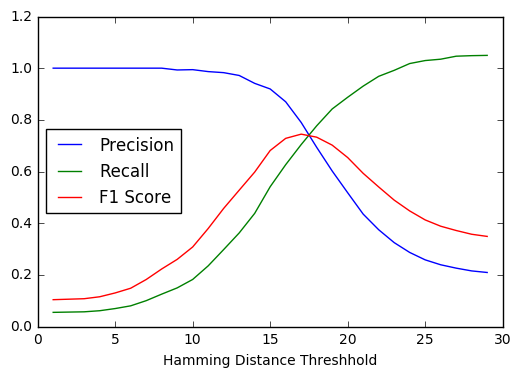

In [71]:
import matplotlib.pyplot as plt

plt.plot(iterations, precisions, label = 'Precision')
plt.plot(iterations, recalls, label = 'Recall')
plt.plot(iterations, f1s, label = 'F1 Score')
plt.xlabel('Hamming Distance Threshhold')
plt.legend(loc='best')
plt.show()